# 데이터 불러오기 / 정리

In [11]:
import pandas as pd

diamond = pd.read_csv('diamonds.csv', engine='python')

diamond = diamond.iloc[:,1:]
diamond = pd.get_dummies(diamond)
diamond.head()

,carat,tdp,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0


## 단순회귀 / 다중회귀를 비교하고 싶다. (슬라이드 20 페이지)

### 단순회귀에서 독립변수를 carat, 종속변수를 price라고 가정

In [3]:
#Series 데이터는 LinearRegression에서 인식을 못하더라구요.. 애먹었습니다..
X_simple = diamond['carat'].to_frame()
y = diamond['price'].to_frame()

X_simple.head()

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31


In [4]:
from sklearn.model_selection import train_test_split

X_sim_train, X_sim_test, y_train, y_test = train_test_split(X_simple, y, test_size=.3, random_state=1)

In [5]:
from sklearn.linear_model import LinearRegression

sim_reg = LinearRegression()
sim_reg.fit(X_sim_train, y_train)
sim_reg.score(X_sim_test, y_test)

print('carat을 독립변수로 하는 단순선형회귀모델의 score: {:f}'.format(sim_reg.score(X_sim_test, y_test)))

carat을 독립변수로 하는 단순선형회귀모델의 score: 0.849320


### 다중회귀에서 feature=3으로 가정하고, 그 독립변수를 carat과 tdp,table로 선택 //단지 설명력이 높아진다는 걸 보이고 싶은 것이기 때문에 임의로 선택한 것

In [6]:
X_sev_features = diamond[['carat', 'tdp', 'table']]

In [7]:
X_mul2_train, X_mul2_test, y_train, y_test = train_test_split(X_sev_features, y, test_size=.3, random_state=1)

mul2_reg = LinearRegression()
mul2_reg.fit(X_mul2_train, y_train)
mul2_reg.score(X_mul2_test, y_test)

print('carat, tdp, table을 독립변수로 하는 단순선형회귀모델의 score: {:.3f}'.format(mul2_reg.score(X_mul2_test, y_test)))

carat, tdp, table을 독립변수로 하는 단순선형회귀모델의 score: 0.854


# 다중회귀와 릿지의 계수 비교

In [9]:
X = diamond.drop('price', axis=1)
y = diamond['price'].to_frame()

X.head()

,carat,tdp,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [9]:
mult_model = LinearRegression()
mult_model.fit(X_train, y_train)
mult_model.coef_
mult_model.score(X_test, y_test)

print(mult_model.coef_)
print('다중회귀의 score:{:f}'.format(mult_model.score(X_test, y_test)))

[[10397.37185625  -121.81880607   -41.66235333 -1155.72324407
     19.7933021     77.63214303  -999.42886334   -11.75181617
    498.05562555   227.6881908    285.43686317]]
다중회귀의 score:0.863948


In [10]:
from sklearn.linear_model import Ridge

Ridge1 = Ridge()
Ridge20 = Ridge(alpha=10)
Ridge1.fit(X_train, y_train)
Ridge20.fit(X_train, y_train)

print(Ridge1.coef_)
print('릿지 alpha=1의 score: {:f}'.format(Ridge1.score(X_test, y_test)))
print(Ridge20.coef_)
print('릿지 alpha=10의 score: {:f}'.format(Ridge20.score(X_test, y_test)))

[[10371.25940966  -121.33755369   -41.64315472 -1144.56771688
     19.82526895    76.97585539  -998.69113682   -12.01876366
    497.85555975   227.51961291   285.33472782]]
릿지 alpha=1의 score: 0.863919
[[10142.70070187  -117.15643734   -41.47864189 -1047.355535
     20.27550329    71.62913565  -992.06561741   -14.37808546
    496.04438706   226.01349481   284.38582099]]
릿지 alpha=10의 score: 0.863633


# 릿지와 라쏘의 계수 비교

In [11]:
from sklearn.linear_model import Lasso

Lasso1 = Lasso()
Lasso20 = Lasso(alpha=20)
Lasso1.fit(X_train, y_train)
Lasso20.fit(X_train, y_train)

print(Lasso1.coef_)
print('라쏘 alpha=1의 score: {:f}'.format(Lasso1.score(X_test, y_test)))
print(Lasso20.coef_)
print('라쏘 alpha=10의 score: {:f}'.format(Lasso20.score(X_test, y_test)))

[ 1.02681442e+04 -1.18074463e+02 -4.29373513e+01 -1.05292032e+03
  4.29441537e+00  2.25566909e+01 -1.18851200e+03 -2.26096681e+02
  2.66144943e+02 -0.00000000e+00  5.56858881e+01]
라쏘 alpha=1의 score: 0.863819
[7805.44283004 -103.10908054  -63.56969845  -13.2360921    -0.
   -0.         -452.70877782   -0.          176.94518452    0.
    0.        ]
라쏘 alpha=10의 score: 0.855919


# 로지스틱 회귀분석 예시

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.keys())

X = iris['data']
y = iris['target']

X, y, iris.DESCR

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## 목표: 꽃받침 길이를 이용하여 Iris-Sentosa 종을 분류

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_sp_length = X[:, 1].reshape(-1,1)
y = (y==0).astype(np.int)

log_reg = LogisticRegression()
log_reg.fit(X_sp_length,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

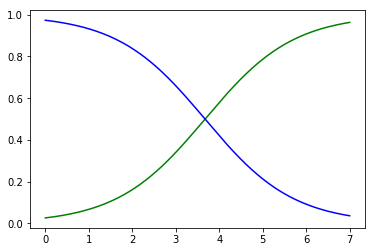

In [14]:
X_new = np.linspace(0, 7, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], 'g-', label='Iris-Sentosa')
plt.plot(X_new, y_prob[:,0], 'b-', label='Not Iris-Sentosa')

In [15]:
log_reg.predict([[2.0], [4.5]])

array([0, 1])

In [4]:
#Quest
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer =  load_breast_cancer()
print(cancer.keys())

X = cancer['data']
y = cancer['target']

X, y, cancer.DESCR

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [8]:
X_radius = X[:, 0].reshape(-1,1)
y = (y==0).astype(np.int)

log_reg = LogisticRegression()
log_reg.fit(X_radius,y)

log_reg.score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

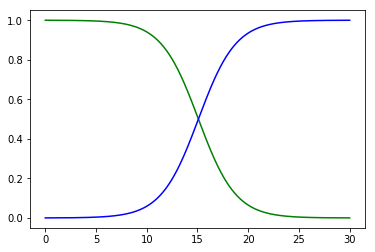

In [12]:
X_new = np.linspace(0,30,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], 'g-', label='Positive-Cancer')
plt.plot(X_new, y_prob[:,0], 'b-', label='Negative-Cancer')

In [10]:
log_reg.predict([[20.0], [0.1]])

array([0, 1])

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')